<a href="https://colab.research.google.com/github/hanhluukim/replication-topic-modelling-in-embedding-space/blob/main/notebook_replication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Das Projekt aus dem Github klonen und in den Projektsordner**

In [ ]:
#wenn die Ordner noch nicht geklont ist, soll dieser Fehler zuerst durchgeführt werden.
!git clone https://github.com/hanhluukim/replication-topic-modelling-in-embedding-space.git

Cloning into 'replication-topic-modelling-in-embedding-space'...
remote: Enumerating objects: 445, done.
remote: Counting objects: 100% (220/220), done.
remote: Compressing objects: 100% (159/159), done.
remote: Total 445 (delta 137), reused 132 (delta 58), pack-reused 225
Receiving objects: 100% (445/445), 4.98 MiB | 5.26 MiB/s, done.
Resolving deltas: 100% (247/247), done.


In [6]:
cd /content/replication-topic-modelling-in-embedding-space

/content/replication-topic-modelling-in-embedding-space


#**Die benötige Paketen für das Projekt mittels requirements.txt installieren**



In [7]:
# Falls die Packages noch nicht installiert wurden, 
!pip install -r "/content/replication-topic-modelling-in-embedding-space/requirements.txt"

# **Gebrauchte Paketen importieren**

In [8]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
import umap.umap_ as umap
import time
import plotly.express as px
from sklearn import cluster
from sklearn import metrics

# **Vorverarbeitung und BOW-Repräsentationen für Textdaten durchführen**
1. Vocabular erstellen
2. BOW-Repräsentationen für allen Teildatensätzen

In [9]:
from src.prepare_dataset import TextDataLoader

In [10]:
# init TextDataLoader für die Datenquelle 20 News Groups
# Daten abrufen vom Sklearn, tokenisieren und besondere Charaktern entfernen
textsloader = TextDataLoader(source="20newsgroups", train_size=None, test_size=None)
textsloader.load_tokenize_texts("20newsgroups")
# Beispiel von Textdaten
textsloader.show_example_raw_texts(n_docs=2)

loading texts: ...
finished load!
check some sample texts of the dataset
['From', ':', 'lerxst', '@', 'wam', '.', 'umd', '.', 'edu', '(', "where's", 'my', 'thing', ')', 'Subject', ':', 'WHAT', 'car', 'is', 'this', '!', '?', 'Nntp', 'Posting', 'Host', ':', 'rac3', '.', 'wam', '.', 'umd', '.', 'edu', 'Organization', ':', 'University', 'of', 'Maryland', ',', 'College', 'Park', 'Lines', ':', '15', 'I', 'was', 'wondering', 'if', 'anyone', 'out', 'there', 'could', 'enlighten', 'me', 'on', 'this', 'car', 'I', 'saw', 'the', 'other', 'day', '.', 'It', 'was', 'a', '2', 'door', 'sports', 'car', ',', 'looked', 'to', 'be', 'from', 'the', 'late', '60s', '/', 'early', '70s', '.', 'It', 'was', 'called', 'a', 'Bricklin', '.', 'The', 'doors', 'were', 'really', 'small', '.', 'In', 'addition', ',', 'the', 'front', 'bumper', 'was', 'separate', 'from', 'the', 'rest', 'of', 'the', 'body', '.', 'This', 'is', 'all', 'I', 'know', '.', 'If', 'anyone', 'can', 'tellme', 'a', 'model', 'name', ',', 'engine', 'specs'

In [11]:
# Vorverarbeitung von Daten mit folgenden Schritten:
textsloader.preprocess_texts(length_one_remove=True, punctuation_lower = True, stopwords_filter = True)

start: preprocessing: ...
finised: preprocessing!


In [12]:
# Daten zerlegen für Train, Test und Validation. Erstellen Vocabular aus dem Trainset
textsloader.split_and_create_voca_from_trainset(max_df=0.7, min_df=10, stopwords_remove_from_voca=True)

test-document-frequency: 
[[ 15  17  12  18  11  16  14  20  12  17  19 135  16  10  15  36  15  19
   11  21  11  10  35  10  13  17  21  54  10  30  24  10  10  15  13  12
   31  29  17  14  10  14  10  10  11  12  12  14  10  17  13  11  13  57
   10  13  12  10  27  12  11  22  19  45  18  20  13  19  21  15  14  13
   19  17  12  16  11  11  62  12  10  10  17  13  11  10  14  11  28  23
   14  12  10  11  11  30  10  19  16  12  14  10  35  12  13  11  21  17
   12  13  13  10  10  15  22  19  46  14  13  28  26  16  10  17  16  25
   11  10  23  10  17  10  12  10  10  13 136  13  11  17  13  17  11  22
   23  12  10  14  11  11  19  11  17  11  10  12  22  12  29  18  11  15
   11  14  18  21  11  21  10  14  29  10  21  13  14  12  12  26  31  17
   48  14  10  13  16  14  21  16  12  21  12  10  17  16  10  18  18  11
   14  21  18  14  32  19  14 135  14  30  13  14  12  23  12  14  11  10
   25  12  10  13  67  11  21  23  37  10  10  25  16 141  21  13  16  39
   26  22  1

In [13]:
# Erstellen BOW-Repräsentation für ETM Modell
for_lda_model = False 
word2id, id2word, train_set, test_set, val_set = textsloader.create_bow_and_savebow_for_each_set(for_lda_model=for_lda_model)

length train-documents-indices : 4275
length of the vocabulary: 348


start: creating bow representation...
finised creating bow input!

start: creating bow representation...
finised creating bow input!

start: creating bow representation...
finised creating bow input!

start: creating bow representation...
finised creating bow input!

start: creating bow representation...
finised creating bow input!

id2word befor saving: dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 13

# **Vocabular und IDs anzeigen als Beispiel**

---





In [14]:
# show for samples: 100 word2id and id2 word
word2id_df_100 = pd.DataFrame()
word2id_df_100['word'] = list(word2id.keys())[:100]
word2id_df_100['id'] = list(word2id.values())[:100]
word2id_df_100

,word,id
0,days,0
1,feel,1
2,thing,2
3,early,3
4,kind,4
...,...,...
95,support,95
96,line,96
97,assuming,97
98,general,98


# **Die Größe von Datensätzen kontrollieren**

In [15]:
# Kontrollieren die Größen von verschiedenen Datensätzen
print(f'Size of the vocabulary after prprocessing ist: {len(textsloader.vocabulary)}')
print(f'Size of train set: {len(train_set["tokens"])}')
print(f'Size of val set: {len(val_set["tokens"])}')
print(f'Size of test set: {len(test_set["test"]["tokens"])}')

Size of the vocabulary after prprocessing ist: 348
Size of train set: 139
Size of val set: 101
Size of test set: 60


# **Dokumenten wiederstellen für Word2Vec Embedding**

---



In [16]:
# re-erstellen von Dokumenten nach der Vorverarbeitungen. Die Dokumenten sind in Wörtern und werden für Word-Embedding Training benutzt
docs_tr, docs_t, docs_v = textsloader.get_docs_in_words_for_each_set()
train_docs_df = pd.DataFrame()
train_docs_df['text-after-preprocessing'] = [' '.join(doc) for doc in docs_tr[:100]]
train_docs_df

,text-after-preprocessing
0,reply college disclaimer care info robert writ...
1,cs university department computer science figu...
2,card questions reply bit ram bit true general ...
3,article institute nntp posting host article wr...
4,call originator ca institute send internationa...
...,...
95,nasa gov laboratory distribution world nntp po...
96,wanted nntp posting host institute distributio...
97,article apr writes expressed major university ...
98,computer systems division distribution world n...


# **Word-Embedding trainieren mit dem Traindatensatz**

In [17]:
from src.embedding import WordEmbeddingCreator
from pathlib import Path
save_path = Path.joinpath(Path.cwd(), "vocab_embedding.txt")
wb_creator = WordEmbeddingCreator(model_name="cbow", documents = docs_tr, save_path= save_path)
wb_creator.train(min_count=0, embedding_size= 10)
vocab = list(word2id.keys())
wb_creator.create_and_save_vocab_embedding(vocab, save_path)
wb_creator.cluster_words(embedding_save_path = save_path, fig_path = Path('figures'), n_components=2)

word-embedding train begins
word-embedding train finished
length of vocabulary from word-embedding model 348
length of the vocabulary of prepraring-dataset-vocabulary: 348


100%|██████████| 348/348 [00:00<00:00, 15801.18it/s]


Cluster id labels for inputted data
[5 4 3 6 0 3 5 8 1 2 3 7 2 1 7 1 7 6 2 5 9 8 5 9 0 1 5 9 7 0 9 8 7 3 7 2 0
 0 2 6 7 1 6 3 5 3 1 0 5 8 5 7 7 0 2 2 7 4 8 6 1 0 7 9 1 6 9 7 7 4 9 3 3 9
 7 8 9 6 3 2 7 7 2 8 7 3 4 2 8 9 0 5 8 7 6 0 4 7 0 0 2 3 2 9 3 8 3 0 4 1 6
 8 0 6 6 6 6 7 0 7 0 0 9 7 5 7 7 0 6 6 9 2 0 9 8 7 8 2 0 9 6 8 9 8 6 9 5 1
 6 2 9 2 8 7 5 6 3 0 7 9 4 2 0 9 0 1 8 6 7 2 0 7 9 1 1 5 5 4 9 8 1 5 0 3 1
 5 6 8 9 8 3 2 5 7 5 4 9 4 7 7 1 1 6 0 3 4 1 0 3 3 7 4 8 9 1 4 9 5 0 4 8 3
 1 5 1 3 1 2 9 9 6 2 5 7 4 2 1 4 8 2 1 9 6 5 6 5 8 4 7 9 5 3 7 4 1 1 7 4 3
 8 1 8 1 6 9 4 1 3 0 7 6 8 9 1 9 9 0 1 1 9 5 8 9 3 1 8 7 9 4 9 1 6 8 2 0 8
 3 0 7 1 0 5 4 6 0 0 3 4 1 4 6 1 7 1 3 0 7 7 6 7 9 6 4 2 7 0 9 8 9 1 3 2 8
 8 4 4 2 5 9 0 8 4 0 3 8 4 4 6]
Centroids data
[[-0.00015533 -0.03818461 -0.02884949 -0.05768432 -0.00089922 -0.04229567
   0.00056679 -0.02797605  0.02412334 -0.00528557]
 [-0.04297236 -0.04285543 -0.02629198 -0.03397148  0.03292746 -0.02319951
   0.01222118 -0.00977055  0.01475015 -0.03

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


True

In [18]:
v = list(wb_creator.model.wv.vocab)[0]
vec = list(wb_creator.model.wv.__getitem__(v))
print(f'word-embedding of the word-- {v}: ')
print(f'vector: {vec}')
print(f'dim of vector: {len(vec)}')

word-embedding of the word-- reply: 
vector: [-0.055647593, -0.08603645, -0.050223187, -0.07851673, 0.06465466, -0.058570564, -0.018530225, 0.051920176, 0.016091611, -0.019912569]
dim of vector: 10


# **Word-Embeddings visualieren als Beispiel**


In [19]:
# read word-embedding files
with open(save_path) as f:
  lines = f.readlines()
embedding_data = []
words_data = []
for t in lines:
  w = t.split("\t")[0]
  v = [float(e) for e in t.split("\t")[1].split(" ")]
  words_data.append(w)
  embedding_data.append(v)

In [20]:
# clustering words with KMeans and Words-Vectors
kmeans = cluster.KMeans(n_clusters=10)
kmeans.fit(embedding_data)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)

Cluster id labels for inputted data
[2 8 9 0 6 7 2 6 6 4 7 2 9 6 3 1 3 0 9 2 5 4 5 5 7 2 2 4 3 6 8 6 3 6 3 9 8
 9 9 9 2 0 7 1 2 4 6 8 2 4 2 3 3 3 9 4 3 1 0 7 6 9 3 5 0 7 5 3 3 1 5 7 4 5
 2 8 5 7 3 9 5 5 4 4 3 4 1 4 6 5 8 9 4 3 0 6 1 3 9 0 4 9 1 0 1 4 7 8 1 6 7
 4 9 7 8 7 7 3 8 3 8 9 5 3 2 2 3 0 7 0 5 4 9 3 4 3 4 1 4 3 7 4 5 8 0 5 2 6
 7 4 4 4 4 2 2 7 1 9 3 5 1 4 9 0 8 6 6 7 3 4 5 9 0 0 6 6 2 1 5 8 2 2 4 9 6
 2 8 4 5 4 4 9 9 5 2 1 5 1 3 3 9 6 0 9 7 1 7 9 9 6 2 1 1 5 0 1 5 9 7 1 8 7
 0 2 0 6 1 1 4 5 5 9 2 2 1 1 6 1 6 5 6 5 7 9 7 9 6 8 5 0 2 7 3 1 6 8 3 1 4
 4 6 4 5 7 9 5 2 7 6 3 0 4 0 2 5 5 8 0 0 0 7 4 5 6 6 6 3 5 1 0 6 4 4 4 8 4
 7 5 4 6 6 5 1 8 0 9 7 1 6 1 0 6 2 6 1 9 3 3 0 3 5 0 1 5 2 9 3 4 5 0 7 4 4
 6 0 1 4 2 0 0 1 8 8 4 4 0 0 7]
Centroids data
[[-9.42228474e-03 -3.67209761e-02 -5.73488731e-03 -3.87772186e-02
   2.44073065e-02 -1.89386000e-05  2.30586422e-02 -2.06212033e-02
   3.14045513e-02 -1.14246240e-02]
 [-1.49679829e-02 -1.82984932e-02 -6.93341969e-03 -6.80353166e-03
   1.1652

In [21]:
# dimension reduction with umap
start = time.time()
reducer = umap.UMAP(random_state=42,n_components=3)
embedding = reducer.fit_transform(embedding_data)
print('Duration: {} seconds'.format(time.time() - start))

# show samples after dim-reduction in dataframe
wb = pd.DataFrame(embedding, columns=['x', 'y', 'z'])
wb['word'] = words_data
wb['cluster'] = ['cluster ' + str(c) for c in labels]

Duration: 2.1788387298583984 seconds


In [22]:
# visualization
fig = px.scatter_3d(wb, 
                    text = wb['word'],
                    x='x', y='y', z='z',
                    color = wb['cluster'],
                    title ="word-embedding-samples")
fig.show()

# **ETM Model**

ETM hat die Architektur eines Variational Autoencoders. 
ETM wird mit den pretrainierten Embedding kombiniert. Die Embeddings für Topics werden als Gewichten eines Teiles des Netzes aktualiert mittels der ELBO Loss

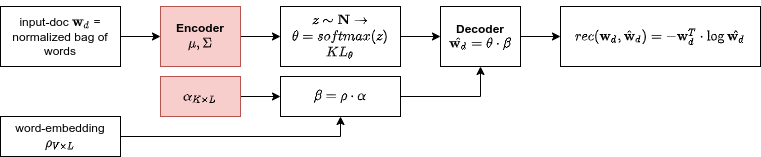

In [23]:
# using DocSet to use easier the modul DataSet from torch
from src.train_etm import DocSet, TrainETM
from src.etm import ETM

vocab_size = len(list(word2id.keys()))
tr_set = DocSet("train", vocab_size, train_set, normalize_data=True)
print(len(tr_set))
print(tr_set.__getitem__(0))

139
tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0476, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0476, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0476, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0476, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0476, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.00

1000
adam
ETM(
  (t_drop): Dropout(p=0.5, inplace=False)
  (theta_act): ReLU()
  (topic_embeddings_alphas): Linear(in_features=10, out_features=5, bias=False)
  (q_theta): Sequential(
    (0): Linear(in_features=348, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): ReLU()
  )
  (mu_q_theta): Linear(in_features=100, out_features=5, bias=True)
  (logsigma_q_theta): Linear(in_features=100, out_features=5, bias=True)
)
number of batches: 23
Epoch: 0/1000  -  Loss: 5.8624982833862305 	 Rec: 5.85275936126709 	 KL: 0.009738001972436905
Epoch: 1/1000  -  Loss: 5.855328559875488 	 Rec: 5.852765083312988 	 KL: 0.002563350135460496
Epoch: 2/1000  -  Loss: 5.853658199310303 	 Rec: 5.852509021759033 	 KL: 0.0011481072288006544
Epoch: 3/1000  -  Loss: 5.853189945220947 	 Rec: 5.852572917938232 	 KL: 0.0006167730898596346
Epoch: 4/1000  -  Loss: 5.8526930809021 	 Rec: 5.852432727813721 	 KL: 0.0002603085886221379
Epoch: 5/1000  -  Los

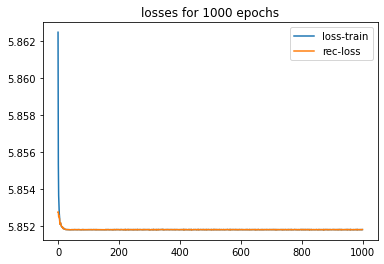

In [24]:
num_topics = 5
t_hidden_size = 100
rho_size = len(embedding_data[0])
emb_size = len(embedding_data[0])
theta_act = "relu"

class TrainArguments:
      def __init__(self, epochs, batch_size, log_interval):
          self.epochs = epochs
          self.batch_size = batch_size
          self.log_interval = log_interval

class OptimizerArguments:
      def __init__(self, optimizer_name, lr, wdecay):
            self.optimizer = optimizer_name
            self.lr = lr
            self.wdecay = wdecay
            
train_args = TrainArguments(epochs=1000, batch_size=6, log_interval=None)
optimizer_args = OptimizerArguments(optimizer_name="adam", lr=0.001, wdecay=0.1)

print(train_args.epochs)
print(optimizer_args.optimizer)

training_set = train_set

# define the ETM-model with setting-parameters
etm_model = ETM(
      num_topics, 
      vocab_size, 
      t_hidden_size, rho_size, emb_size, theta_act, 
      embedding_data, 
      enc_drop=0.5)

print(etm_model)

# start training
train_class = TrainETM().train(
    etm_model,
    vocab_size, 
    train_args, optimizer_args, training_set, 
    normalize_data = True) 
    #num_topics, t_hidden_size, rho_size, emb_size, theta_act, embedding_data, 0.5)